##The law of large numbers
Let X1, X2, …, Xn be i.i.d with distribution F with finite mean μ and finite variance σ2.
Then, as 𝑛 → ∞, P(|(X1 + X2 + … + Xn)/n – μ| is small) → 1

##Central Limit Theorem

Theorem: Let X1, X2,...... Xn be i.i.d  with distribution F, finite mean μ and finite variance. The for large n, the distribution of X1 + X2 + ... + Xn is approximately nomal with mean nμ and variance nσ2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats  as stats
from scipy.stats import uniform
from scipy.stats import norm
import seaborn
from collections import Counter
seaborn.set()
%matplotlib inline

In [ ]:
#Start from generating random int from uniform ditribution

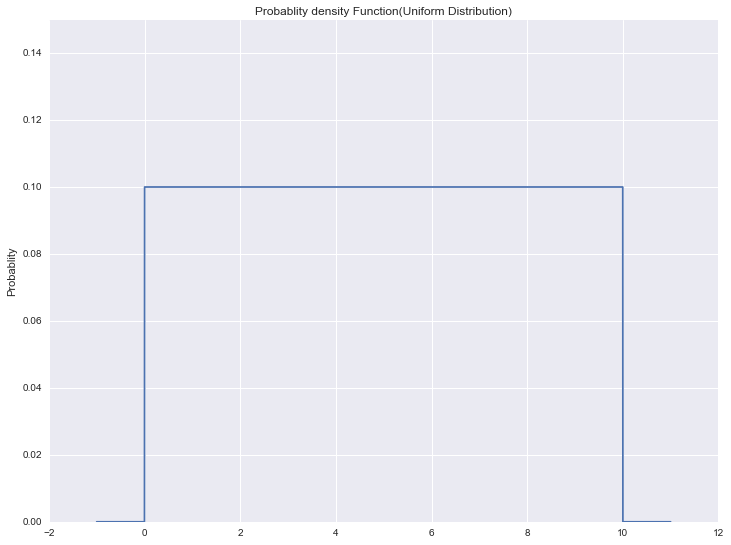

In [172]:
####Examples to visulaze this process
#Generate a uniform distribution an average of -1, and plot the probablity density function
x= np.arange(-1,11,0.001)
plt.plot(x, uniform.pdf(x,loc = 0,scale = 10))
plt.title("Probablity density Function(Uniform Distribution)")
plt.ylabel('Probablity')
plt.ylim((0,0.15))
plt.show()

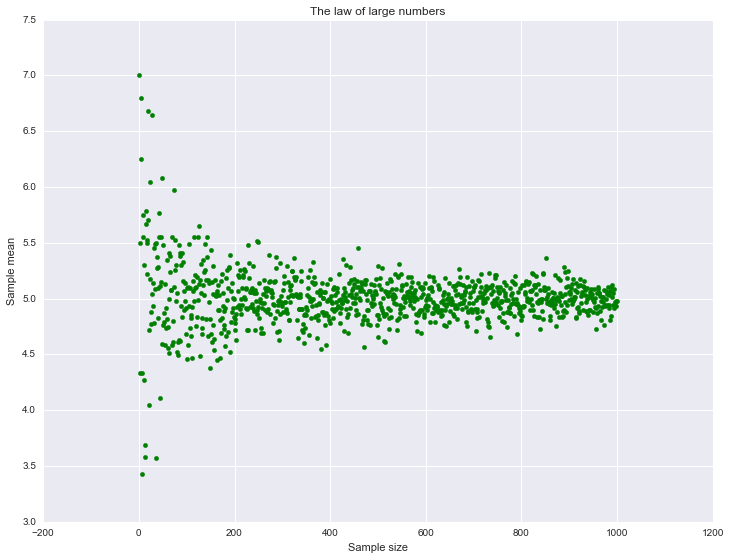

In [174]:
#Gnerate random numbers from the same uniform distribution with different sample size 
#And then calculate the mean of samples
lst = list()
for i in range(1,1000):
    sample = np.random.random_integers(0, 10, [i])
    sample_mean = np.mean(sample)
    lst.append([i,sample_mean])
lst = np.array(lst)
plt.scatter(lst[:,0],lst[:,1], color = 'g')
plt.title("The law of large numbers")
plt.ylabel('Sample mean')
plt.xlabel('Sample size')
plt.show()

In [ ]:
#With sampe size from 1 to 1000, (X1+X2+…+Xn)/n is close to μ = E[X]= 5 for large n
#But how can we decide a large n, how "Large" will be large enough?
#Let's look at central limited theorm 
#With same sample size how the sampe mean will distribute?

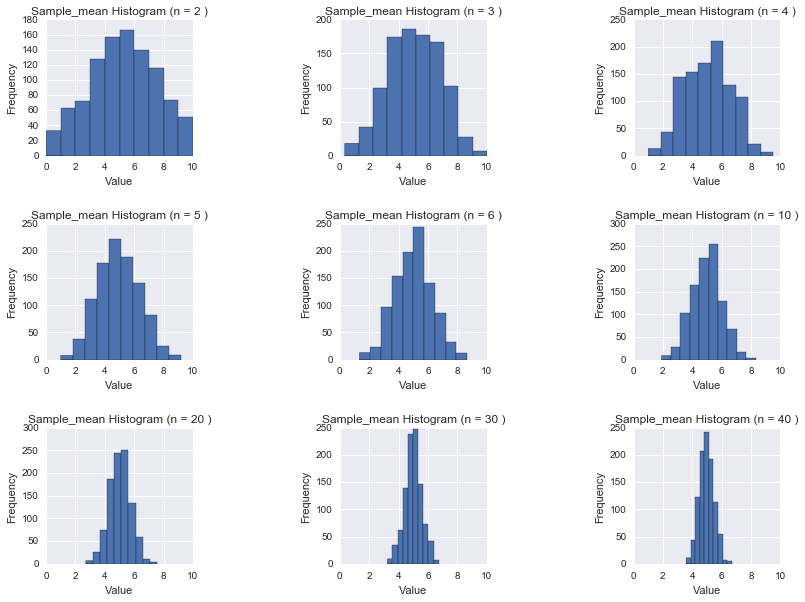

In [45]:
##### create different rand samples from this uniform distribution with sample size from n = 2 to n = 40

N = 1000
n = 2
np.random.seed(19680801)
def Sample_mean_distribute(N,n):
    sample = np.random.random_integers(0, 10, [N,n])
    sample_mean = np.mean(sample,axis=1)
    sample_stdev =np.std(sample,axis=1)
    plt.hist(sample_mean,normed=1, color='green')
    y, x, _ = plt.hist(sample_mean )
    plt.title("Sample_mean Histogram (n = " + str(n) + " )")
    plt.xlim(0,10)
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    #plt.show()

plt.figure(1)
plt.subplot(331)
Sample_mean_distribute(N,2) 
plt.subplot(332)
Sample_mean_distribute(N,3) 
plt.subplot(333)
Sample_mean_distribute(N,4) 
plt.subplot(334)
Sample_mean_distribute(N,5) 
plt.subplot(335)
Sample_mean_distribute(N,6) 
plt.subplot(336)
Sample_mean_distribute(N,10) 
plt.subplot(337)
Sample_mean_distribute(N,20) 
plt.subplot(338)
Sample_mean_distribute(N,30)
plt.subplot(339)
Sample_mean_distribute(N,40)

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5,
                    wspace=1)
plt.show()

##Looking into those sample mean distribution with sample number from 2 to 22, we can clearly see that sample mean is getting more and more centroized with uniform distribution mean μ = 5, and they are normally distributed with mean = 5 

##How to calucalte the large n

#If we have a confident interval for 95%, how can we say that (X1+X2+…+Xn)/n only differs from μ = E[X] by a small amount (say 0.02)?

P(|(X1+X2+…+Xn)/n - μ|< 0.02) >= 0.95

#From central limite Theorem we can know that [sqrt(n) * ((𝑋1+𝑋2+⋯+𝑋𝑛)/𝑛 – 𝜇 )/𝜎 ] is approximately N(0, 1)

𝑃(−𝛿 < ((𝑋1+𝑋2+⋯+𝑋𝑛)/ n  – 𝜇 )× sqrt(𝑛)/𝜎 ) < 𝛿 ≈ Φ(δ) – Φ(-δ)

#If we assign Φ(δ) – Φ(-δ) = 0.95, with the look up table from normal distribution we can find 𝜎 = 1.96
 then 1.96 𝜎 / sqrt(n)  = 0.02
Use the sample variance 𝑆2 =((𝑋n − 𝜇𝑠) * (𝑋n − 𝜇𝑠)+(𝑋n − 𝜇𝑠) * (𝑋n − 𝜇𝑠)+.....+(𝑋n − 𝜇𝑠) * (𝑋n − 𝜇𝑠)) /(𝑛 − 1) 
S will be the estimator of 𝜎

#So we need to keep generating Xi until we have a large sample with size n so that 1.96 𝑆 / sqrt(n) = 0.02, we can say we are 95% confident that the mean of the samples will only differ from μ by a very samll amount 

#Let's simulate this porcess with the same uniform distribution

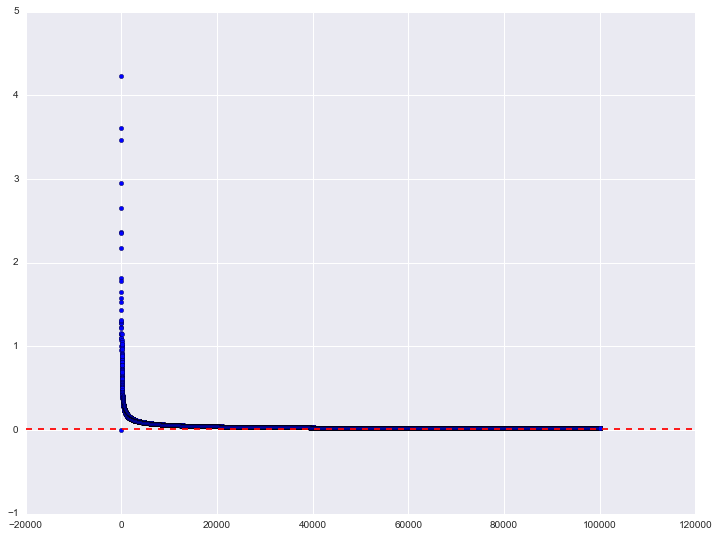

In [203]:
criteria = list()
line = list()
large_n = list()
for i in range(1,100000):
    sstd = np.std((np.random.random_integers(0, 10, [i]))) # generate n samples from uniform distribution
    criteria.append([i,1.96 * sstd / np.sqrt(i)])
    line.append([i,0.02])
    if i > 1 and  float(1.96 * sstd / np.sqrt(i)) < 0.02:
        large_n.append(i)
        
lst_2 = np.array(lst_2)
criteria = np.array(criteria)
print(large_n[0])
plt.scatter(criteria[:,0],criteria[:,1])
plt.axhline(y=0.01, color='r', linestyle='--')
#print(criteria[:,1])

In [213]:
print(np.min(large_n))
#large_n

95378


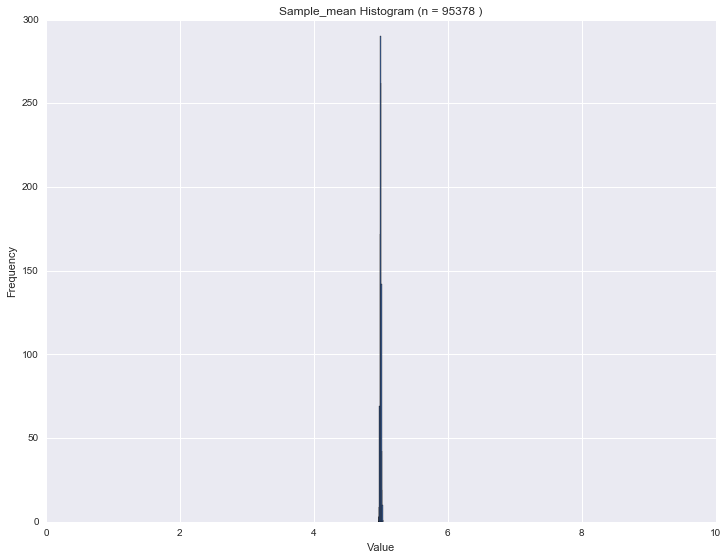

In [214]:
#Let's look at how the sample means distributed with sample size = 10000, they are very tight with 5
Sample_mean_distribute(1000,np.min(large_n))